In [14]:
"""Runs an XFOIL analysis for a given airfoil and flow conditions"""
import os
import subprocess
import numpy as np

# %% Inputs

airfoil_name = "NACA0012"
alpha_i = 0
alpha_f = 10
alpha_step = 0.25
Re = 1000000
n_iter = 100

# %% XFOIL input file writer 

if os.path.exists("polar_file.txt"):
    os.remove("polar_file.txt")

input_file = open("input_file.in", 'w')
input_file.write("LOAD {0}.dat\n".format(airfoil_name))
input_file.write(airfoil_name + '\n')
input_file.write("PANE\n")
input_file.write("OPER\n")
input_file.write("Visc {0}\n".format(Re))
input_file.write("PACC\n")
input_file.write("polar_file.txt\n\n")
input_file.write("ITER {0}\n".format(n_iter))
input_file.write("ASeq {0} {1} {2}\n".format(alpha_i, alpha_f,
                                             alpha_step))
input_file.write("\n\n")
input_file.write("quit\n")
input_file.close()

subprocess.call("xfoil.exe < input_file.in", shell=True)

polar_data = np.loadtxt("polar_file.txt", skiprows=12)

In [15]:
np.savetxt("saved_polar_data.txt", polar_data, fmt='%0.4f', header='Angle_of_Attack Cl Cd Cm etc.', comments='# ')

In [13]:
import numpy as np

# Assuming polar_data is already loaded
print("Preview of polar_data:")
print(polar_data[:5, :])  # Show first 5 rows and all columns

Preview of polar_data:
[[ 0.000e+00  0.000e+00  5.410e-03  1.140e-03 -0.000e+00  6.870e-01
   6.869e-01]
 [ 2.500e-01  2.690e-02  5.400e-03  1.150e-03  3.000e-04  6.612e-01
   7.120e-01]
 [ 5.000e-01  5.380e-02  5.430e-03  1.160e-03  7.000e-04  6.356e-01
   7.373e-01]
 [ 7.500e-01  8.060e-02  5.450e-03  1.180e-03  1.000e-03  6.089e-01
   7.613e-01]
 [ 1.000e+00  1.075e-01  5.490e-03  1.220e-03  1.400e-03  5.825e-01
   7.847e-01]]


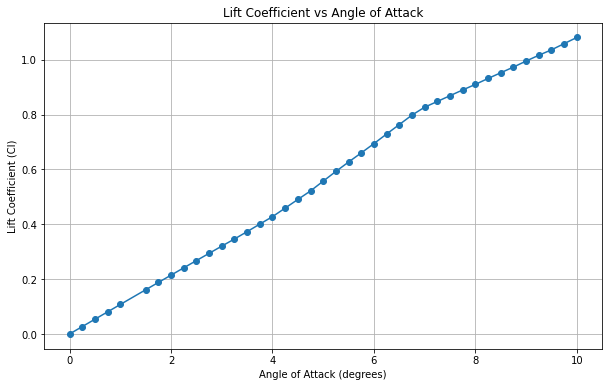

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Load polar data, assuming the file format includes a header or comments in the first 12 rows
polar_data = np.loadtxt("polar_file.txt", skiprows=12)


angle_of_attack = polar_data[:, 0]
lift_coefficient = polar_data[:, 1]

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(angle_of_attack, lift_coefficient, marker='o', linestyle='-')
plt.title('Lift Coefficient vs Angle of Attack')
plt.xlabel('Angle of Attack (degrees)')
plt.ylabel('Lift Coefficient (Cl)')
plt.grid(True)
plt.show()
